In [24]:

from simulation import differential_equations
from simulation.differential_equations import DifferentialEquations
from networks import WattsStrogatzNetwork, BaNetwork
from simulation.ponzi_simulation import PonziSimulation
import simulation.parameters_calculator
from simulation.finance_data import FinanceData
import numpy as np
import matplotlib.pyplot as plt

import importlib

In [25]:
importlib.reload(differential_equations_2)

eq = DifferentialEquations(
    N=10000, M=100, lambda_= lambda t: 0.25, avg_k=5, mu = lambda t: 0.5, rr= lambda t: 0.1, rp=lambda t: 0.1, ponzi_capital=5000
)

eq.solve(0, 30, 1000)
eq.graph('asd')

at 0.0 lambda is 0.25, mu is 0.5
pars: 0.0001, 0.9999, 5000.0, 0.0, 0.0, 10000, 100, 5, 0.1, 0.1
at 0.011202501946417953 lambda is 0.25, mu is 0.5
pars: 0.00010084004761470702, 0.999898599827288, 5007.001423685237, 0.0001400172712027914, 1.400172712027914e-06, 10000, 100, 5, 0.1, 0.1
at 0.002 lambda is 0.25, mu is 0.5
pars: 0.000100149975, 0.999899750025, 5001.249975, 2.4997500000000006e-05, 2.4997500000000004e-07, 10000, 100, 5, 0.1, 0.1
at 0.003 lambda is 0.25, mu is 0.5
pars: 0.00010022521547022113, 0.999899624615808, 5001.762996714596, 3.751592145961219e-05, 3.7510297022112186e-07, 10000, 100, 5, 0.1, 0.1
at 0.008 lambda is 0.25, mu is 0.5
pars: 0.00010060170564096617, 0.9998989970900618, 5005.091929222131, 0.00010013073004958358, 1.0009076409661622e-06, 10000, 100, 5, 0.1, 0.1
at 0.008888888888888889 lambda is 0.25, mu is 0.5
pars: 0.00010066879110910629, 0.9998988852734129, 5006.59019770307, 0.00011127453838170733, 1.1122522642777605e-06, 10000, 100, 5, 0.1, 0.1
at 0.01 lambda is

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



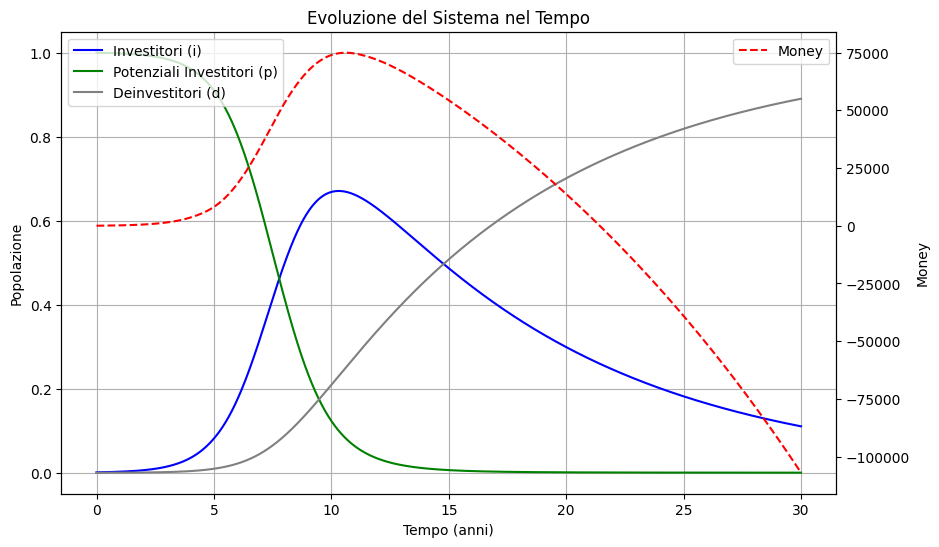

In [26]:
eq = DifferentialEquations(
    N=1000, M=100, lambda_= lambda t: 0.2, avg_k=5, mu = lambda t: 0.1, rr= lambda t: 0.05, rp=lambda t: 0.1,
)

eq.solve(0, 30, 10000)
eq.solve_money()
eq.graph('asd')

In [27]:
net2 = BaNetwork.load_json('my_networks/ba1.json')

parameters = {
    #'m0': 2,
    #'m': 2,
    'n_nodes':30000,
    'interest':0.1/12., # interesse 10% annuo
    'ponzi_capital':0,
    'interest_calculating_periods':12,
    'capital_per_person': 0
}
#net2.set_parameters(parameters)
interest_calculator = simulation.parameters_calculator.ParameterCalculator(rp= lambda t: 0.1, rr= lambda t: 0.05)



Network caricato da my_networks/ba1.json


In [28]:
ponzi = PonziSimulation(
    network = net2,
    interest_calculator = interest_calculator,
    max_time_units = 30 * 12,
    dt = 1. / 12,
    lambda_ = lambda t: 0.2,
    mu = lambda t: 0.1,
    capital_per_person = 100,
    ponzi_capital = 5000)

ponzi_capital, investor, potential, deinvestor, degrees_money = ponzi.simulate_ponzi()

Starting simulation with lambda=<function <lambda> at 0x0000014C560244A0>, mu=<function <lambda> at 0x0000014C56026700>
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete
65.56% complete


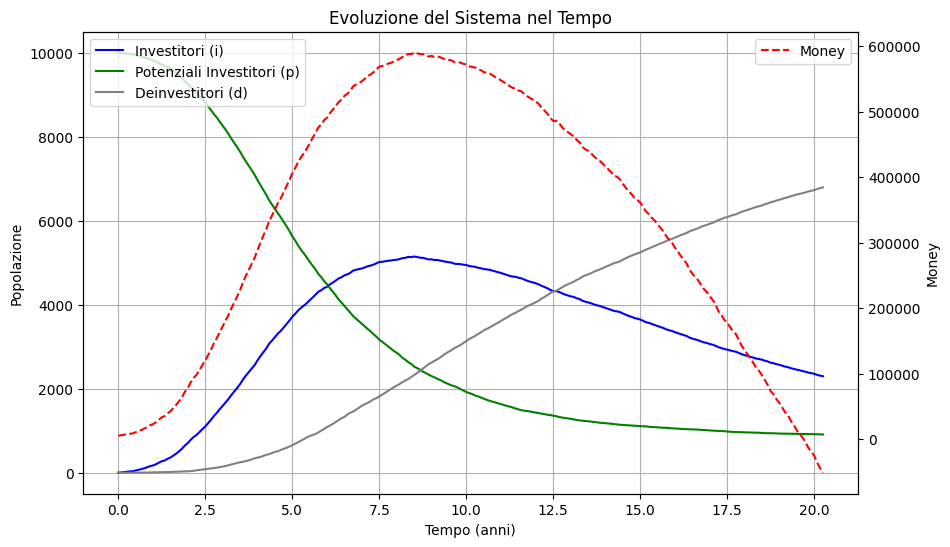

In [29]:
ponzi.graph('asd')

In [30]:
importlib.reload(simulation.parameters_calculator)
#importlib.reload(DifferentialEquations)
data = FinanceData()
data.download()

interest_calc_sp500 = simulation.parameters_calculator.ParameterCalculator(rp= lambda t: 0.1, rr=lambda t: data.market_rr(t) * 12)

interest_calc_sp500.compute_market_positivity(0, 30, 100)

#plt.plot(t, [interest_calc_sp500.market_positivity(ti) for ti in t])
#plt.plot(t, [interest_calc_sp500.mu_from_rr_func()(ti) for ti in t])
#plt.plot(t, [interest_calc_sp500._market_positivity_cont(ti, interest_calc_sp500.r_r) for ti in t])
#plt.plot(np.linspace(-1, 1), [interest_calc_sp500.mu_from_market_positivity(xi)for xi in np.linspace(-1, 1)])
#plt.plot(np.linspace(-1, 1), [interest_calc_sp500._market_positivity_cont(10, lambda t: x) for x in np.linspace(-1, 1)])

[*********************100%***********************]  1 of 1 completed
C:\Users\Torto\PycharmProjects\Ponzi-Scheme\networks\interest_calculator.py:59: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  positivity= quad(integrand, t_start, t_end)[0]


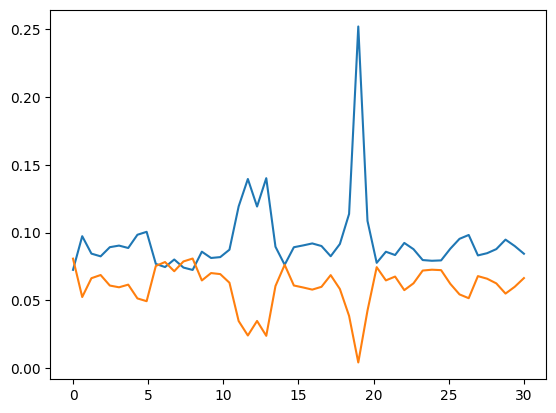

In [31]:
importlib.reload(simulation.parameters_calculator)


plt.plot(np.linspace(0, 30), [interest_calc_sp500.mu_from_rr_func(max=0.5)(ti)for ti in np.linspace(0, 30)])
plt.plot(np.linspace(0, 30), [interest_calc_sp500.lambda_from_rr_func(min=0, max=0.1, steepness=5)(ti)for ti in np.linspace(0, 30)])


Network caricato da my_networks/ba1.json
Starting simulation with lambda=<function InterestCalculator.lambda_from_rr_func.<locals>.<lambda> at 0x0000014C56A9ECA0>, mu=<function InterestCalculator.mu_from_rr_func.<locals>.<lambda> at 0x0000014C56A9E340>
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete


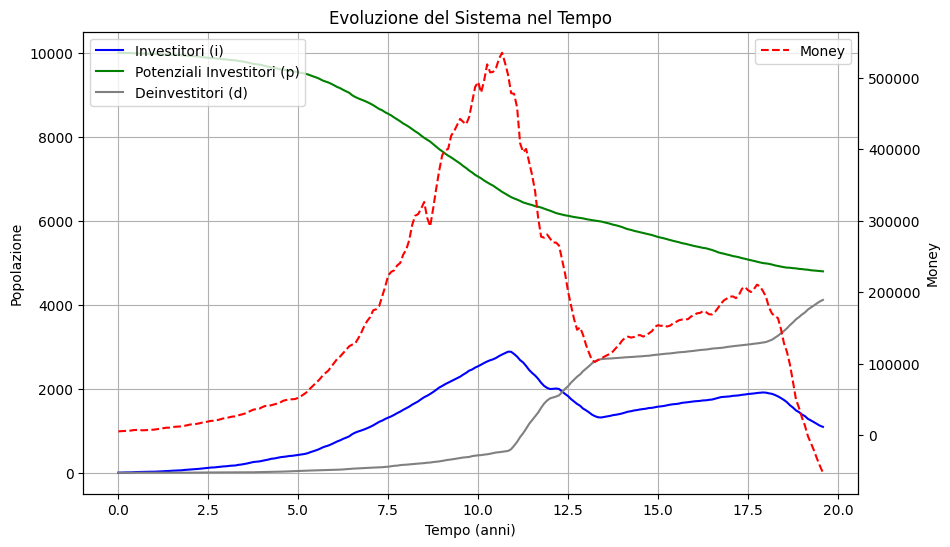

In [32]:
net2 = BaNetwork.load_json('my_networks/ba1.json')

parameters = {
    #'m0': 2,
    #'m': 2,
    'n_nodes':30000,
    'interest':0.1/12., # interesse 10% annuo
    'ponzi_capital':0,
    'lambda_': 0.1/12.,
    'mu': 0.2/12.,
    'interest_calculating_periods':12,
}
#net2.set_parameters(parameters)

ponzi_sp = PonziSimulation(
    network = net2,
    interest_calculator = interest_calc_sp500,
    max_time_units = 30 * 12,
    dt = 1. / 12,
    lambda_ = interest_calc_sp500.lambda_from_rr_func(max=0.1, steepness=10),
    mu = interest_calc_sp500.mu_from_rr_func(max=0.5, steepness=30),
    capital_per_person = 100,
    ponzi_capital = 5000)
ponzi_sp.simulate_ponzi()

ponzi_sp.graph('asd')

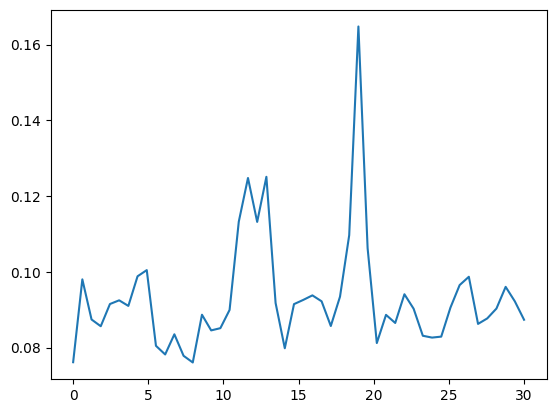

In [33]:
t = np.linspace(0, 30)
plt.plot(t, [interest_calc_sp500.mu_from_rr_func()(ti) for ti in t])

Network caricato da my_networks/ws1.json
Starting simulation with lambda=<function <lambda> at 0x0000014C57A26E80>, mu=<function InterestCalculator.mu_from_rr_func.<locals>.<lambda> at 0x0000014C57A27B00>
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete
65.56% complete
70.56% complete
75.83% complete
80.83% complete
86.11% complete
91.39% complete
96.39% complete


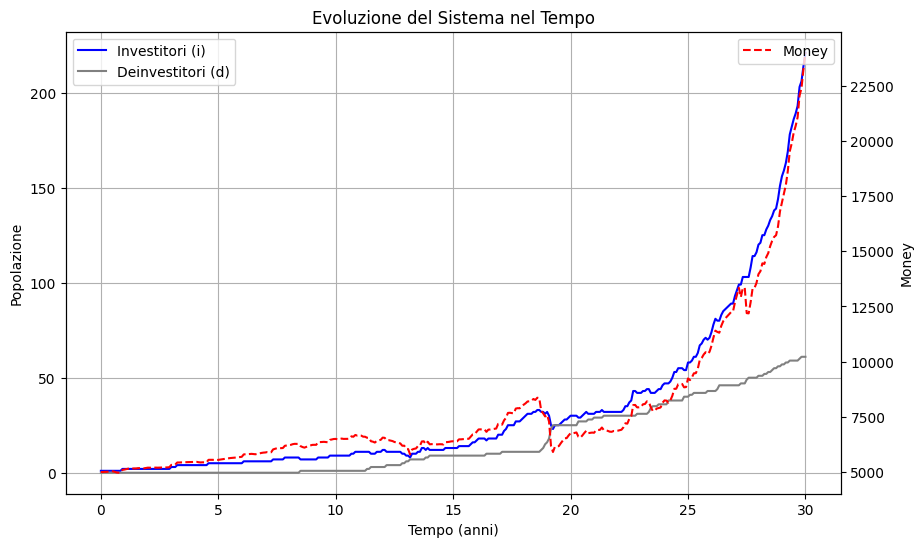

In [61]:

net2 = WattsStrogatzNetwork.load_json('my_networks/er.json')

interest_calculator = simulation.parameters_calculator.ParameterCalculator(rp= lambda t: 0.1, rr= data.market_rr)

ponzi = PonziSimulation(
    network=net2,
    interest_calculator=interest_calculator,
    max_time_units=30 * 12,
    dt=1. / 12,
    lambda_= lambda _: 0.05,#interest_calc_sp500.lambda_from_rr_func(max=0.1, steepness=10),
    mu= interest_calc_sp500.mu_from_rr_func(base=0.05, min=0.03, max=0.8, steepness=150),
    capital_per_person=100,
    ponzi_capital=5000)
ponzi.simulate_ponzi()

ponzi.graph('asd', show_potential=False)



In [ ]:
net2.print

In [62]:
net2.print_k_info()

'Mean: 10.0, k^2: 101.823'

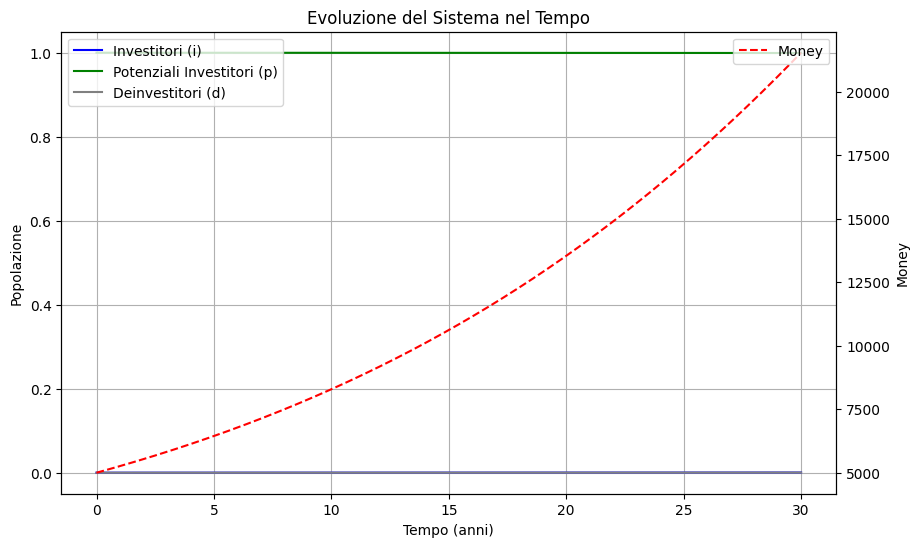

In [39]:

#net2 = BaNetwork.load_json('my_networks/ba1.json')

interest_calculator2 = simulation.parameters_calculator.ParameterCalculator(rp= lambda t: 0.15, rr= lambda t: 0.05)

eq = DifferentialEquations(N=10000, M=100, rp=interest_calculator.rp, rr=interest_calculator.rr, mu=lambda _:0.05, ponzi_capital=5000, lambda_ = lambda _: 0.02, avg_k=5)
eq.solve(0, 30, 1000)
eq.graph('asd')
# ponzi = PonziSimulation(
#     network=net2,
#     interest_calculator=interest_calculator,
#     max_time_units=30 * 12,
#     dt=1. / 12,
#     lambda_= lambda _: 0.02,#interest_calc_sp500.lambda_from_rr_func(max=0.1, steepness=10),
#     mu= lambda _: 0.05,#interest_calc_sp500.mu_from_rr_func(max=0.5, steepness=30),
#     capital_per_person=100,
#     ponzi_capital=5000)
# ponzi.simulate_ponzi()
#
# ponzi.graph('asd', show_potential=False)



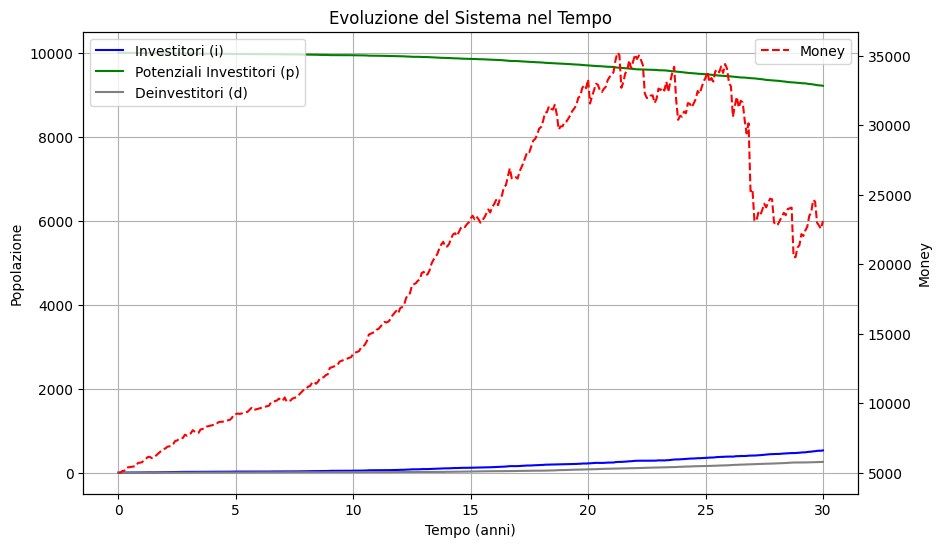

'Mean: 3.9994, k^2: 61.36'

In [35]:
ponzi.graph('asd', show_potential=True)

net2.print_k_info()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
C:\Users\Torto\PycharmProjects\Ponzi-Scheme\networks\interest_calculator.py:59: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  positivity= quad(integrand, t_start, t_end)[0]


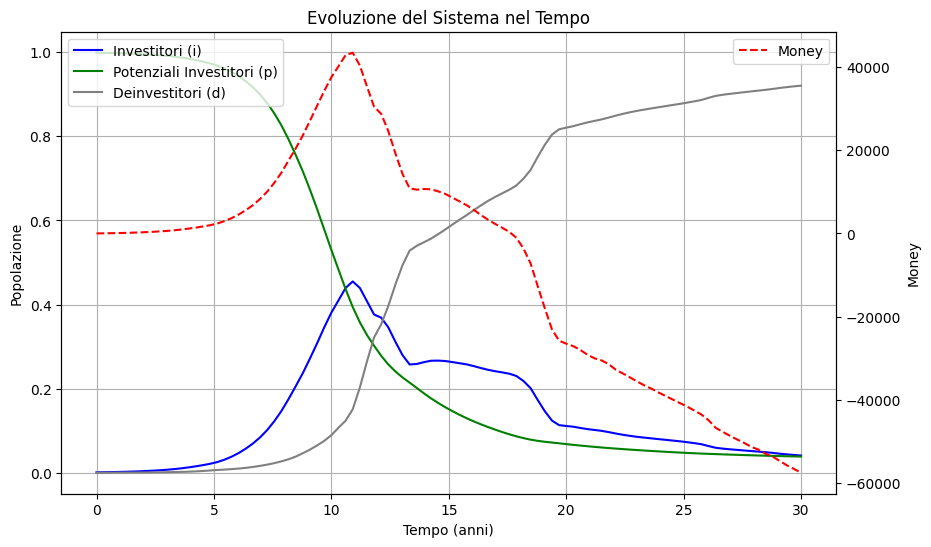

In [1]:
from simulation.differential_equations import DifferentialEquations
from simulation.parameters_calculator import ParameterCalculator
from simulation.finance_data import FinanceData
data = FinanceData()
data.download()
interest_calculator2 = ParameterCalculator(rp=lambda _: 0.1, rr=data.market_rr)

interest_calculator2.compute_market_positivity(0, 30, 100)

eq = DifferentialEquations(
    N=1000, M=100,
    lambda_= lambda ti: interest_calculator2.lambda_from_rr_func(base=0.1, min=0, max=0.1, steepness=30)(ti) + 0.1, avg_k=5,
    mu =interest_calculator2.mu_from_rr_func(0.2, 0.1, 0.6, 150), rr=interest_calculator2.rr, rp=lambda t: 0.1, ponzi_capital=0
)

eq.solve(0, 30, 100)
eq.graph('asd')